In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
#plt.style.use('ggplot')
plt.style.use('seaborn')
#plt.style.use('fivethirtyeight')

# **Casos diarios**.

In [24]:
df = pd.read_csv('TotalesNacionales.csv').transpose()
df = df.rename(columns={i: df.loc['Fecha', i] for i in range(19)})
df = df.drop(index=['Fecha'])
df.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in df.index]
df.sample(5)

,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales,Casos activos por FD,Casos activos por FIS,Casos recuperados por FIS,Casos recuperados por FD,Casos confirmados recuperados,Casos activos confirmados,Casos probables acumulados,Casos activos probables,Casos nuevos sin notificar,Casos confirmados por antigeno,Casos con sospecha de reinfeccion,Casos nuevos confirmados por antigeno
2020-12-24,1598,593310,NaN,16303,13214,741,2395,26870,13214,563793,550137,563457,13214,82518,2555,56,NaN,NaN,NaN
2021-04-25,4386,1.16954e+06,NaN,25856,43174,1746,6638,93037,43174,1.10051e+06,1.05064e+06,1.09992e+06,43174,212801,13082,506,13630,772,405
2020-12-26,1618,598394,NaN,16404,14275,864,2564,28613,14275,567715,553377,567376,14275,83082,2374,82,NaN,NaN,NaN
2020-04-30,780,16023,8580,227,7216,108,888,7216,NaN,NaN,8580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-13,1427,571919,NaN,15886,10887,684,2139,21489,10887,545146,534544,544822,10887,79067,2188,28,NaN,NaN,NaN


In [26]:
# Se agrega casos diarios
df['Casos diarios'] = df['Casos totales'].diff(periods=1)
# Algo pasa el 2020-06-17, aumentaron demasiado los casos ese día.
n = 7
# Se agrega columna promedio 7 días para casos diarios.
df['Casos diarios promedio {} días'.format(n)] = df['Casos diarios'].rolling(window=n).mean()

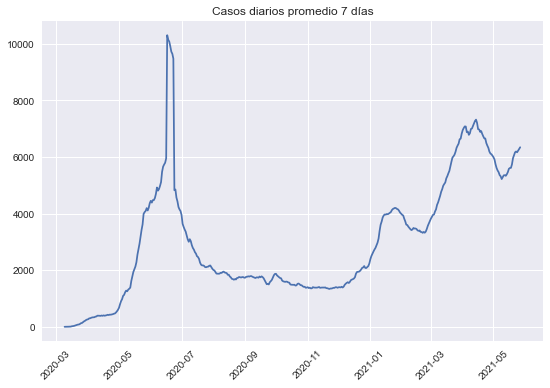

In [32]:
#df = df.drop(index=['2020-06-17'])
plt.plot(df.index[7:], df['Casos diarios promedio 7 días'][7:].values)
plt.xticks(rotation=45)
plt.title('Casos diarios promedio 7 días')
plt.show()

# **Pacientes COVID-19 en UCI por grupo de edad**

In [2]:
edad = pd.read_csv('HospitalizadosUCIEtario_T.csv')
edad.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in edad['Grupo de edad']]
edad.drop(columns=['Grupo de edad'], inplace=True)
edad

,<=39,40-49,50-59,60-69,>=70
2020-04-01,23,23,53,39,35
2020-04-02,23,27,67,46,37
2020-04-03,26,34,74,56,47
2020-04-04,40,36,84,68,52
2020-04-05,40,40,89,75,63
...,...,...,...,...,...
2021-05-23,604,605,710,554,368
2021-05-24,615,616,713,559,390
2021-05-25,615,616,717,555,388
2021-05-26,622,633,724,559,407


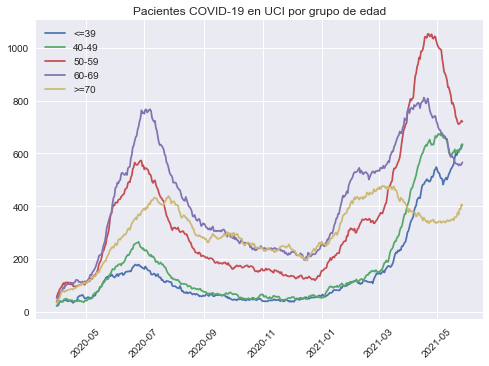

In [9]:
for grupo in edad.columns:
    plt.plot(edad.index, edad[grupo], label=grupo)

plt.title('Pacientes COVID-19 en UCI por grupo de edad')
plt.legend()
plt.xticks(rotation=45)
plt.show()